In [1]:
% load_ext autoreload
% autoreload 2

from ml.preprocessing import DataPreprocessor
from ml.train_creator import TrainCreator
from ml.click_lgbm import ClickLGBM
from ml.click_catboost import ClickCatBoost

import warnings

import pandas as pd

pd.options.display.max_columns, pd.options.display.max_rows = 5000, 500
pd.options.display.float_format = '{:.3f}'.format
warnings.filterwarnings("ignore")

/Users/victorialokteva/LLMtesttask/venv/lib/python3.11/site-packages/pydantic/_internal/_fields.py:149: UserWarning: Field "model_paths" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(


In [2]:
data = DataPreprocessor().preprocessing()

In [3]:
data.head()

,uid,fc_imp_chk,fc_time_chk,utmtr,mm_dma,osName,model,hardware,site_id,tag,domain,site_category,year,month,hour,week_day,click
0,00000000-0000-0001-6268-957597321099,0,7,6,517,Android,SM-N960U,Mobile Phone,dotesports.com,vcontent,com,sport,2021,7,19,Wednesday,False
1,00000000-0000-0001-6268-957946481763,0,7,6,505,Android,Pixel 4a,Mobile Phone,online.seterra.com,vregistration,com,other,2021,7,19,Wednesday,False
2,00000000-0000-0001-6268-958052831367,0,7,6,501,iOS,iPhone,Mobile Phone,hiphopdx.com,vregistration,com,other,2021,7,19,Wednesday,False
3,00000000-0000-0001-6268-958153731939,0,7,6,517,Android,SM-G991U,Mobile Phone,vivaelbirdos.com,vregistration,com,other,2021,7,19,Wednesday,False
4,00000000-0000-0001-6268-959263331420,0,7,6,517,Android,SM-N975U,Mobile Phone,landgrantholyland.com,vregistration,com,other,2021,7,19,Wednesday,False


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9583 entries, 0 to 9582
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   uid            9583 non-null   object
 1   fc_imp_chk     9583 non-null   int64 
 2   fc_time_chk    9583 non-null   int64 
 3   utmtr          9583 non-null   int64 
 4   mm_dma         9583 non-null   int64 
 5   osName         9583 non-null   object
 6   model          9583 non-null   object
 7   hardware       9583 non-null   object
 8   site_id        9583 non-null   object
 9   tag            9583 non-null   object
 10  domain         9583 non-null   object
 11  site_category  9583 non-null   object
 12  year           9583 non-null   int32 
 13  month          9583 non-null   int32 
 14  hour           9583 non-null   int32 
 15  week_day       9583 non-null   object
 16  click          9583 non-null   bool  
dtypes: bool(1), int32(3), int64(4), object(9)
memory usage: 1.1+ MB


In [5]:
data['site_id'].value_counts()

site_id
nypost.com                    1545
whatculture.com               1369
dailymotion.com                584
digitalspy.com                 349
myfox8.com                     327
                              ... 
wtva.com                         1
butterwithasideofbread.com       1
buzzaboutbees.net                1
inspiredbycharm.com              1
14ymedio.com                     1
Name: count, Length: 1472, dtype: int64

In [6]:
data.loc[data['site_id'].str.contains('fox'), 'site_id'].value_counts()

site_id
myfox8.com            327
foxbusiness.com       113
fox19.com               6
fox2now.com             5
fox6now.com             5
fox35orlando.com        2
fox4kc.com              2
fox17online.com         2
fox8live.com            2
fox47news.com           1
foxandbriar.com         1
foxsanantonio.com       1
foxcarolina.com         1
fox17.com               1
fox59.com               1
fox29.com               1
nxslink.myfox8.com      1
Name: count, dtype: int64

Train

In [7]:
train, validation = TrainCreator().transform()

LGBM

In [8]:
ClickLGBM().cross_val_score()  # 44796355529756215

0.4337904525299131

In [9]:
ClickLGBM().save_model()

In [10]:
validation = ClickLGBM().validation()
validation.head()

LogLoss:  0.43981938810377286
Accuracy:  0.8116849243609807


,fc_imp_chk,fc_time_chk,utmtr,mm_dma,osName,model,hardware,domain,site_category,year,month,hour,week_day,click,prediction
0,0,7,0,527,Android,SM-G973U,Mobile Phone,com,news,2021,7,1,Monday,False,0.520
1,0,7,4,518,iOS,iPhone,Mobile Phone,com,news,2021,8,12,Tuesday,False,0.839
2,0,7,5,539,iOS,iPhone,Mobile Phone,com,other,2021,7,16,Friday,True,0.072
3,0,7,5,539,iOS,iPhone,Mobile Phone,com,other,2021,7,17,Wednesday,False,0.106
4,0,7,6,505,Android,SM-N975U,Mobile Phone,com,news,2021,7,19,Sunday,True,0.699


In [11]:
# experiments = ClickLGBM().optuna_optimization(100)

In [12]:
# experiments.head()

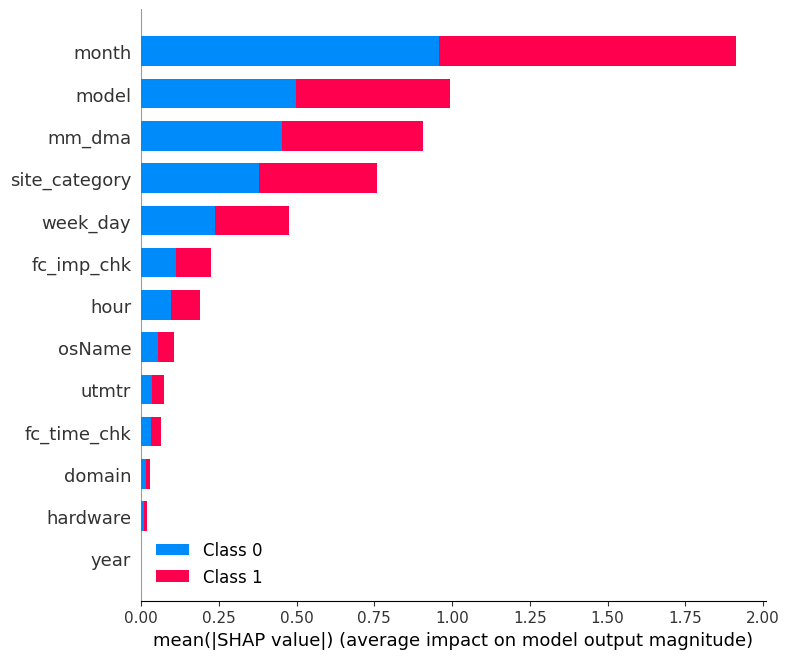

In [13]:
ClickLGBM().feature_importance(is_shap=True)

In [14]:
feature_importance = ClickLGBM().feature_importance(is_shap=False)
feature_importance

,feature,gain
0,mm_dma,21.972
1,hour,19.330
2,model,17.192
3,week_day,14.106
4,utmtr,10.003
5,month,4.981
6,fc_imp_chk,4.948
7,site_category,3.646
8,osName,1.694
9,hardware,1.088


CatBoost

In [15]:
ClickCatBoost().cross_val_score()  # 4382027887487491

Training on fold [0/5]

bestTest = 0.4381946545
bestIteration = 441

Training on fold [1/5]

bestTest = 0.4092579966
bestIteration = 483

Training on fold [2/5]

bestTest = 0.4294641387
bestIteration = 415

Training on fold [3/5]

bestTest = 0.4334655445
bestIteration = 375

Training on fold [4/5]

bestTest = 0.4295002035
bestIteration = 583

     iterations  test-Logloss-mean  test-Logloss-std  train-Logloss-mean  \
0             0              0.674             0.002               0.674   
1             1              0.656             0.003               0.656   
2             2              0.639             0.004               0.639   
3             3              0.624             0.004               0.624   
4             4              0.613             0.002               0.612   
..          ...                ...               ...                 ...   
679         679              0.429             0.011               0.328   
680         680              0.429             

0.4290098412395169

In [16]:
ClickCatBoost().save_model()

In [17]:
validation = ClickCatBoost().validation()
validation.head()

LogLoss:  0.42801897409955725
Accuracy:  0.8111632759520083


,index,uid,fc_imp_chk,fc_time_chk,utmtr,mm_dma,osName,model,hardware,domain,site_category,year,month,hour,week_day,click
0,3264,00000000-0000-0001-6272-613604941017,0,7,0,527,Android,SM-G973U,Mobile Phone,com,news,2021,7,1,Monday,False
1,7498,00000000-0000-0001-6279-945387121616,0,7,4,518,iOS,iPhone,Mobile Phone,com,news,2021,8,12,Tuesday,False
2,5630,00000000-0000-0001-6276-627418591735,0,7,5,539,iOS,iPhone,Mobile Phone,com,other,2021,7,16,Friday,True
3,4673,00000000-0000-0001-6274-939137071136,0,7,5,539,iOS,iPhone,Mobile Phone,com,other,2021,7,17,Wednesday,False
4,3147,00000000-0000-0001-6272-400916361907,0,7,6,505,Android,SM-N975U,Mobile Phone,com,news,2021,7,19,Sunday,True


In [18]:
# experiments = ClickCatBoost().optuna_optimization(100)

In [19]:
# experiments

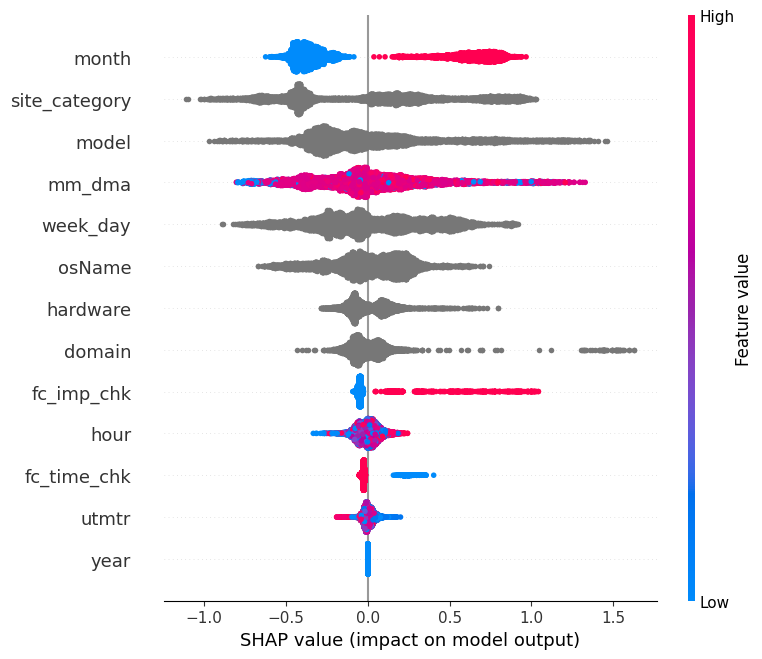

In [20]:
ClickCatBoost().feature_importance()

Other Promts

In [21]:
data.head()

,uid,fc_imp_chk,fc_time_chk,utmtr,mm_dma,osName,model,hardware,site_id,tag,domain,site_category,year,month,hour,week_day,click
0,00000000-0000-0001-6268-957597321099,0,7,6,517,Android,SM-N960U,Mobile Phone,dotesports.com,vcontent,com,sport,2021,7,19,Wednesday,False
1,00000000-0000-0001-6268-957946481763,0,7,6,505,Android,Pixel 4a,Mobile Phone,online.seterra.com,vregistration,com,other,2021,7,19,Wednesday,False
2,00000000-0000-0001-6268-958052831367,0,7,6,501,iOS,iPhone,Mobile Phone,hiphopdx.com,vregistration,com,other,2021,7,19,Wednesday,False
3,00000000-0000-0001-6268-958153731939,0,7,6,517,Android,SM-G991U,Mobile Phone,vivaelbirdos.com,vregistration,com,other,2021,7,19,Wednesday,False
4,00000000-0000-0001-6268-959263331420,0,7,6,517,Android,SM-N975U,Mobile Phone,landgrantholyland.com,vregistration,com,other,2021,7,19,Wednesday,False


Assess the effectiveness of advertising on different devices based on clicks. Present the results in the form of an ordered list in descending order of performance along with the corresponding Click-Through Rates (CTR).

In [26]:
rare_models = [model for model, count in data['model'].value_counts().items() if count < 5]
data['is_rare_model'] = data['model'].isin(rare_models)

click_models = (data
                .loc[data['is_rare_model'] == False]
                .groupby('model')
                ['click']
                .mean()
                .reset_index())

click_models.head()

,model,click
0,5007Z,0.000
1,5062Z,0.556
2,A501DL,1.000
3,BE2015,0.333
4,BE2025,0.400


Create targeting based on the top 10 DMAs (Designated Market Areas) by CTR.

In [28]:
rare_models = [model for model, count in data['mm_dma'].value_counts().items() if count < 5]
data['is_rare_dma'] = data['mm_dma'].isin(rare_models)

click_dmas = (data
              .loc[data['is_rare_dma'] == False]
              .groupby('mm_dma')
              ['click']
              .mean()
              .reset_index())

click_dmas.sort_values('click', ascending=False).head(10)

,mm_dma,click
0,0,0.387
1,501,0.342
2,503,0.250
3,504,0.786
4,505,0.383


Propose targeting based on the top 5 best hours of the day by CTR. Present the results in the form of an ordered list in descending order of performance along with the corresponding CTR.

In [34]:
click_hours = (data
              .groupby('hour')
              ['click']
              .mean()
              .reset_index())

click_hours.sort_values('click', ascending=False).head(5)

,hour,click
22,22,0.515
6,6,0.474
23,23,0.463
3,3,0.458
5,5,0.458
